**Exercise 13.31**. Suppose that $\{Y_t\}$ is a white noise process not necessarily normal. Use the orthogonality properties given in Appendix J to establish the following at the Fourier frequencies.

**(a)** The sample spectral density is an unbiased estimator of the theoretical spectral density.

**(b)** The variables $\hat{A}_{f_1}$ and  $\hat{B}_{f_2}$ are uncorrelated for any Fourier frequencies $f_1$, $f_2$.

**(c)** If the Fourier frequencies $f_1 \neq f_2$, the variables and are uncorrelated.

**Solution**.

**(a)**  The sample spectral density is

$$ \hat{S}(f) = \frac{n}{4}\left(\hat{A}_f^2 + \hat{B}_f^2\right) $$

where

$$
\hat{A}_f = \frac{2}{n} \sum_{t=1}^n Y_t \cos (2 \pi t f)
\quad \text{and} \quad
\hat{B}_f = \frac{2}{n} \sum_{t=1}^n Y_t \sin (2 \pi t f)
$$

Therefore,

$$
\begin{align}
\text{E}[\hat{S}(f)]& = \frac{n}{4}  \text{E}\left[\left( \frac{2}{n} \sum_{t=1}^n Y_t \cos (2 \pi t f) \right)^2 + \left( \frac{2}{n} \sum_{t=1}^n Y_t \sin (2 \pi t f) \right)^2 \right] \\
&= \frac{1}{n} \text{E}\left[ \sum_{t=1}^n Y_t^2 + 2 \sum_{i < j} Y_i Y_j \cos (2 \pi (i - j) f) \right] \\
&= \frac{1}{n} \sum_{t=1}^n \text{E}[Y_t^2] +  2 \sum_{i < j} \text{E}[Y_i Y_j] \cos (2 \pi (i - j) f) \\
&= \gamma_0 +  2 \sum_{k=1}^\infty 0 \cdot \cos (2 \pi k f) \\
&= S(f)
\end{align}
$$

so the sample spectral density has an estimated value equal to the theoretical spectral density.

**(b)**  We have:

$$ 
\begin{align}
\text{Cov}\left[\hat{A}_{f_1}, \hat{B}_{f_2}\right] &= \text{Cov}\left[\frac{2}{n} \sum_{t=1}^n Y_t \cos (2 \pi t f_1),  \frac{2}{n} \sum_{t=1}^n Y_t \sin (2 \pi t f_2) \right] \\
&= \frac{4}{n^2} \sum_{t=1}^n \text{Var}[Y_t] \cos (2 \pi t f_1) \sin (2 \pi t f_2) \\
&= \frac{4 \gamma_0}{n^2} \sum_{t=1}^n \cos \left(2 \pi \frac{j}{n} t\right) \sin \left(2 \pi \frac{k}{n} t \right) \\
&= 0
\end{align}
$$

where we used the representation of the Fourier sequences $f_1 = j/n$, $f_2 = k/n$, and the orthogonality statement from Equation (13.J.3):

$$ \sum_{t=1}^n \cos \left(2 \pi \frac{j}{n} t\right) \sin \left(2 \pi \frac{k}{n} t \right) = 0 \tag{13.J.3} $$

**(c)**  We have:

$$ 
\begin{align}
\text{Cov}\left[\hat{A}_{f_1}, \hat{A}_{f_2}\right] &= \text{Cov}\left[\frac{2}{n} \sum_{t=1}^n Y_t \cos (2 \pi t f_1),  \frac{2}{n} \sum_{t=1}^n Y_t \cos (2 \pi t f_2) \right] \\
&= \frac{4}{n^2} \sum_{t=1}^n \text{Var}[Y_t] \cos (2 \pi t f_1) \cos (2 \pi t f_2) \\
&= \frac{4 \gamma_0}{n^2} \sum_{t=1}^n \cos \left(2 \pi \frac{j}{n} t\right) \cos \left(2 \pi \frac{k}{n} t \right) \\
&= 0
\end{align}
$$

where we used the representation of the Fourier sequences $f_1 = j/n$, $f_2 = k/n$, and the orthogonality statement from Equation (13.J.4):

$$ \sum_{t=1}^n \cos \left(2 \pi \frac{j}{n} t\right) \cos \left(2 \pi \frac{k}{n} t \right) = \begin{cases}
n/2 &\text{for } j = k \; (j \neq 0, j \neq n/2) \\
n &\text{for } j = k = 0 \\
0 &\text{for } j \neq k
\end{cases} \tag{13.J.4} $$

**Exercise 13.32**. Carry out a simulation analysis similar to those reported in Exhibits 13.21, 13.22, 13.23, and 13.24. Use an AR(2) model with $\phi_1 = 0.5$, $\phi_2 = −0.8$, and $n = 48$. Replicate the series 1000 times.

**(a)** Display the average sample spectral density by frequency and compare it with large sample theory.

**(b)** Display the standard deviation of the sample spectral density by frequency and compare it with large sample theory.

**(c)** Display the QQ plot of the appropriately scaled sample spectral density compared with large sample theory at several frequencies. Discuss your results.

**Solution**.

In [1]:
require(ggplot2)
require(latex2exp)

Loading required package: ggplot2

Loading required package: latex2exp



In [2]:
source('periodogram.R')

In [3]:
spectral_density_ar2 <- function(phi1, phi2) {
    function(f) {
        1 / ((1 + phi1**2 + phi2**2 - 2 * phi1 * (1 - phi2) * cos(2 * pi * f) - 2 * phi2 * cos(4 * pi * f)))
    }
}

rowStds <- function(x, ...) {
  sqrt(rowSums((x - rowMeans(x, ...))^2, ...)/(dim(x)[2] - 1))
}

In [4]:
B = 1000

set.seed(0)
Pxx = NULL

for (i in 1:B) {
    Y = arima.sim(model=list(ar=c(0.5, -0.8)), n=48)
    p = periodogram(Y, plot=F)
    f = p$freq
    Pxx = cbind(Pxx, p$spec)
}

Pxx_mean = rowMeans(Pxx)
Pxx_std = rowStds(Pxx)

**(a)**

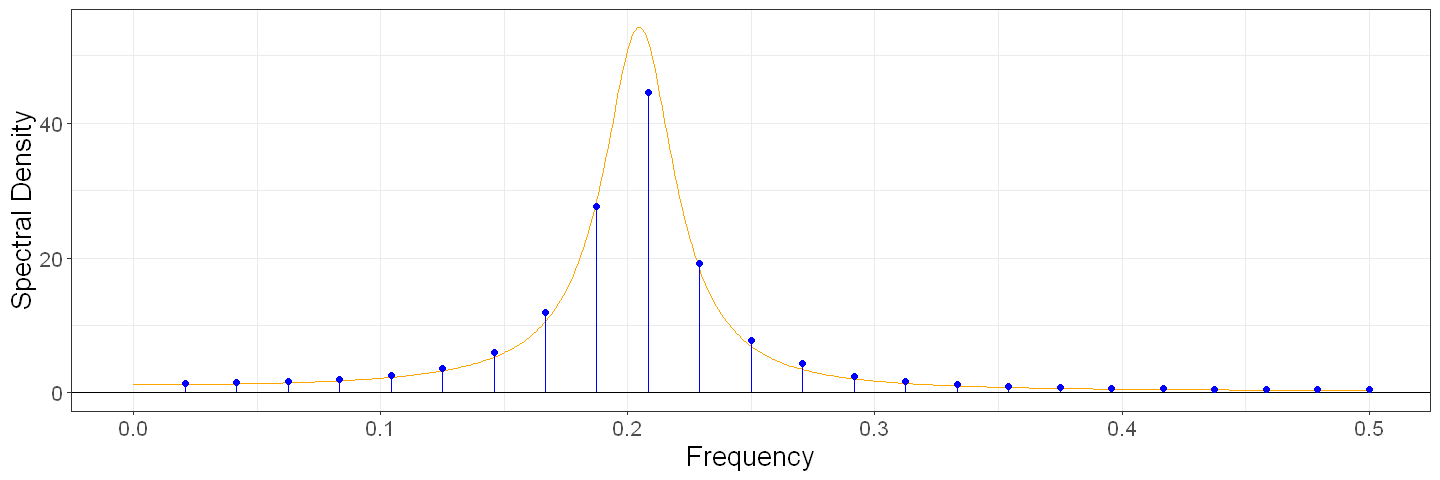

In [5]:
options(repr.plot.width=12, repr.plot.height=4)

ft = 0:500 / 1000
d = spectral_density_ar2(0.5, -0.8)(ft) * 2

ggplot() + 
  geom_hline(yintercept=0, color='black') +
  geom_line(aes(x=ft, y=d), color='orange') +
  geom_point(aes(x=f, y=Pxx_mean), color='blue') +
  geom_segment(aes(x=f, y=Pxx_mean, xend=f, yend=0), color='blue') +
  xlab('Frequency') + ylab('Spectral Density') +
  theme_bw() + theme(text = element_text(size=16))

After scaling adjustment, the overall shape is in agreement.

**(b)**

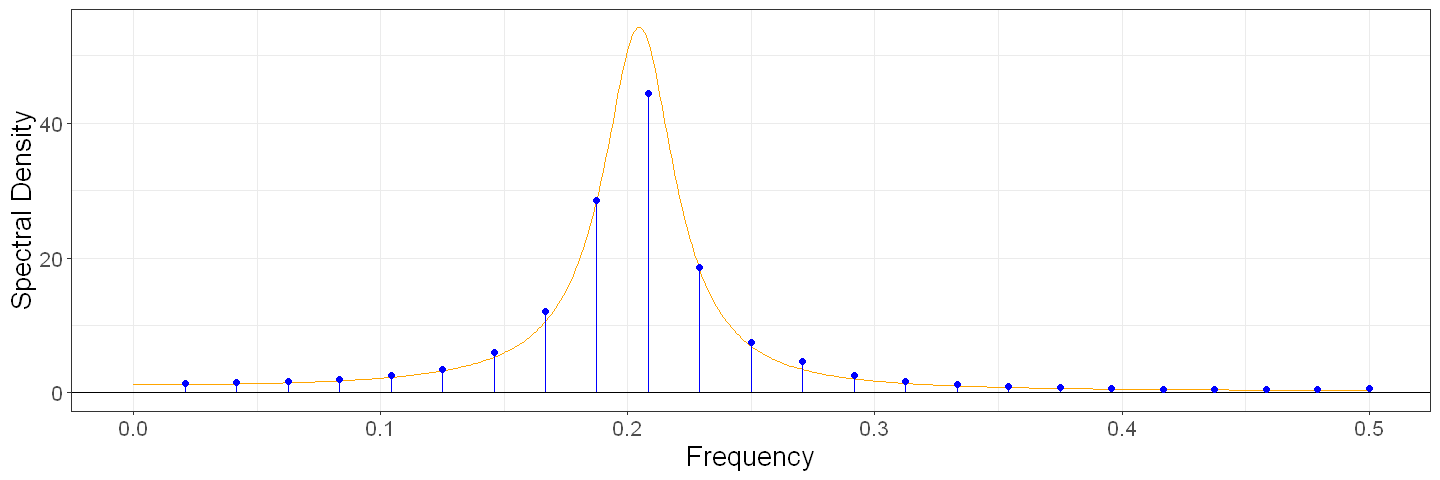

In [6]:
options(repr.plot.width=12, repr.plot.height=4)

ft = 0:500 / 1000
d = spectral_density_ar2(0.5, -0.8)(ft) * 2

ggplot() + 
  geom_hline(yintercept=0, color='black') +
  geom_line(aes(x=ft, y=d), color='orange') +
  geom_point(aes(x=f, y=Pxx_std), color='blue') +
  geom_segment(aes(x=f, y=Pxx_std, xend=f, yend=0), color='blue') +
  xlab('Frequency') + ylab('Spectral Density') +
  theme_bw() + theme(text = element_text(size=16))

Again, a reasonable agreement in shape (after adjustment in scaling).

**(c)**  The expected distribution of the sample spectral density at any particular frequency should be a chi-squared distribution with two degrees of freedom.

In [7]:
sd(1:5)

[1] 1.581139

In [8]:
plot_frequency <- function(Pxx, index, freq_value) {
    # Rescale plot area
    options(repr.plot.width=8, repr.plot.height=6)
    
    # Explicitly built chi-square quantiles with 2 degrees of freedom
    x = qchisq(((1:B)-.5)/B, df=2)
    y = Pxx[index, 1:B]
    
    qqplot(
      x=x, y=y, 
      xlab='Chi-Square Quantitles',ylab='Sample Spectral Distribution',
      main=paste0('QQ plot at frequency f = ', round(freq_value, 3))
    )
    qqline(y, distribution = function(p) qchisq(p, df = 2))
}

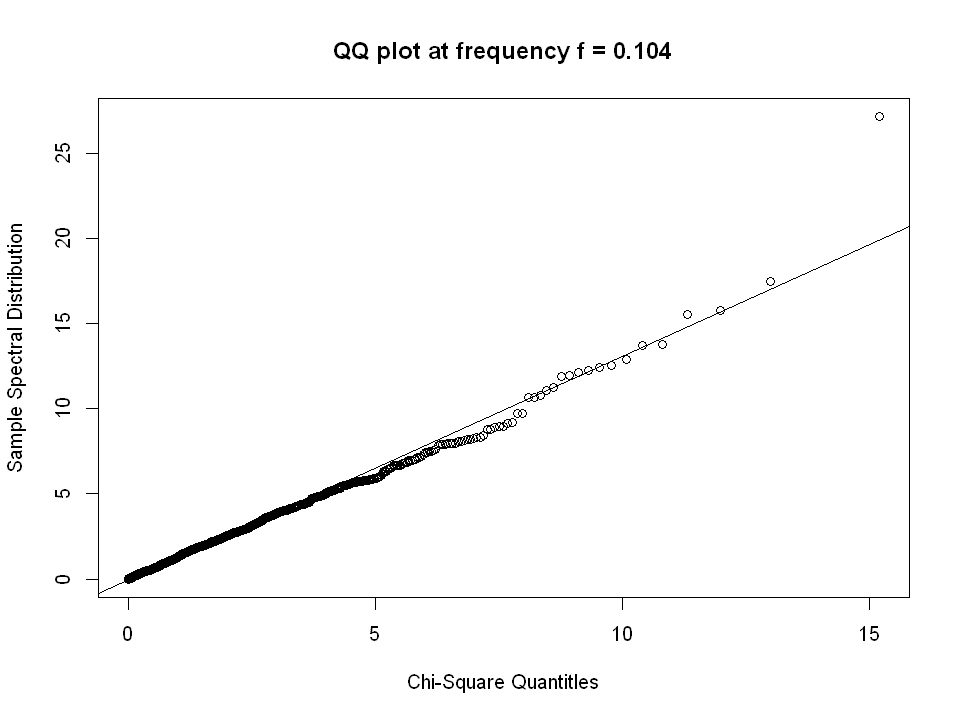

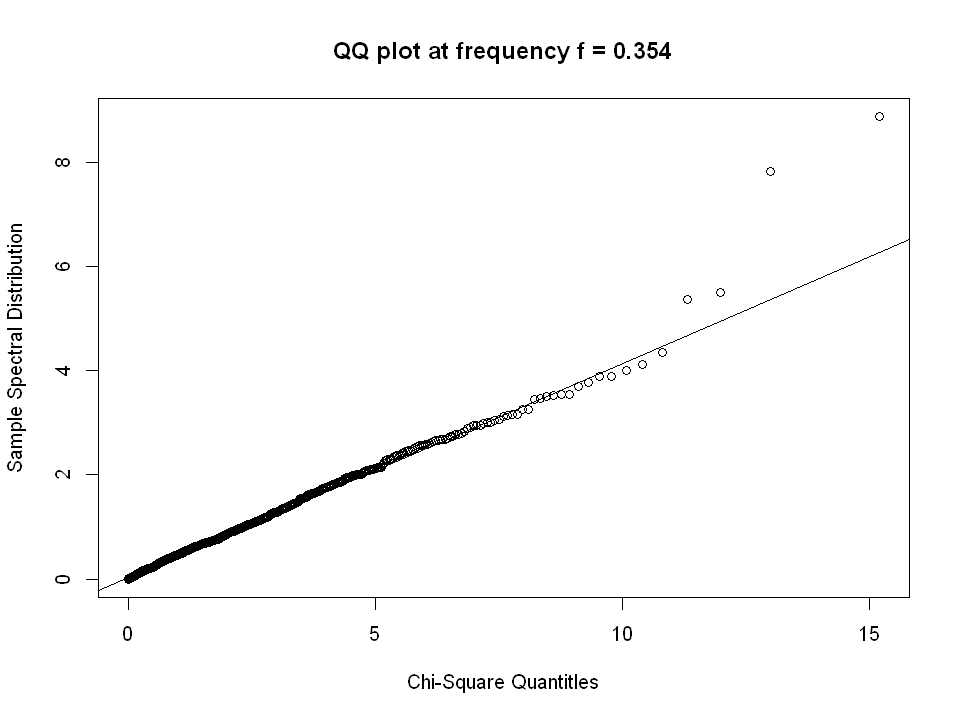

In [9]:
plot_frequency(Pxx, 5, f[5])
plot_frequency(Pxx, 17, f[17])

The quantile-quantile plots seem to be in agreement.

**Exercise 13.33**. Carry out a simulation analysis similar to those reported in Exhibits 13.21, 13.22, 13.23, and 13.24. Use an AR(2) model with $\phi_1 = -1$, $\phi_2 = −0.75$, and $n = 96$. Replicate the series 1000 times.

**(a)** Display the average sample spectral density by frequency and compare it with large sample theory.

**(b)** Display the standard deviation of the sample spectral density by frequency and compare it with large sample theory.

**(c)** Display the QQ plot of the appropriately scaled sample spectral density compared with large sample theory at several frequencies. Discuss your results.

**Solution**.

In [10]:
B = 1000

set.seed(0)
Pxx = NULL
for (i in 1:B) {
    Y = arima.sim(model=list(ar=c(-1, -0.75)), n=96)
    p = periodogram(Y, plot=F)
    f = p$freq
    Pxx = cbind(Pxx, p$spec)
}

Pxx_mean = rowMeans(Pxx)
Pxx_std = rowStds(Pxx)

**(a)**

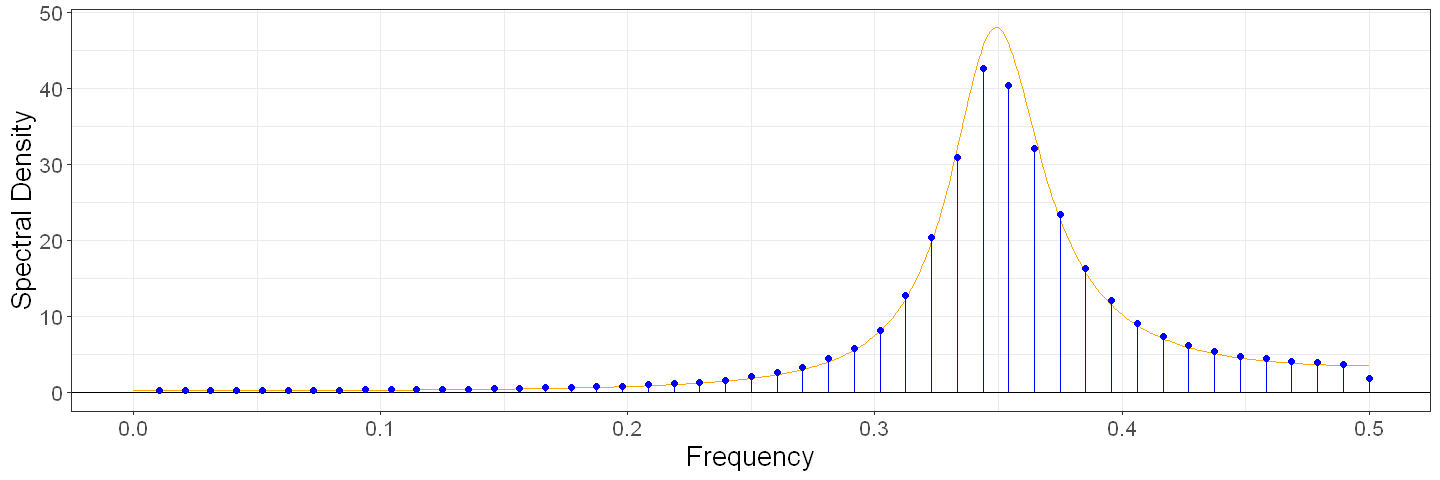

In [11]:
options(repr.plot.width=12, repr.plot.height=4)

ft = 0:500 / 1000
d = spectral_density_ar2(-1, -0.75)(ft) * 2

ggplot() + 
  geom_hline(yintercept=0, color='black') +
  geom_line(aes(x=ft, y=d), color='orange') +
  geom_point(aes(x=f, y=Pxx_mean), color='blue') +
  geom_segment(aes(x=f, y=Pxx_mean, xend=f, yend=0), color='blue') +
  xlab('Frequency') + ylab('Spectral Density') +
  theme_bw() + theme(text = element_text(size=16))

After scaling adjustment, the overall shape is in agreement.

**(b)**

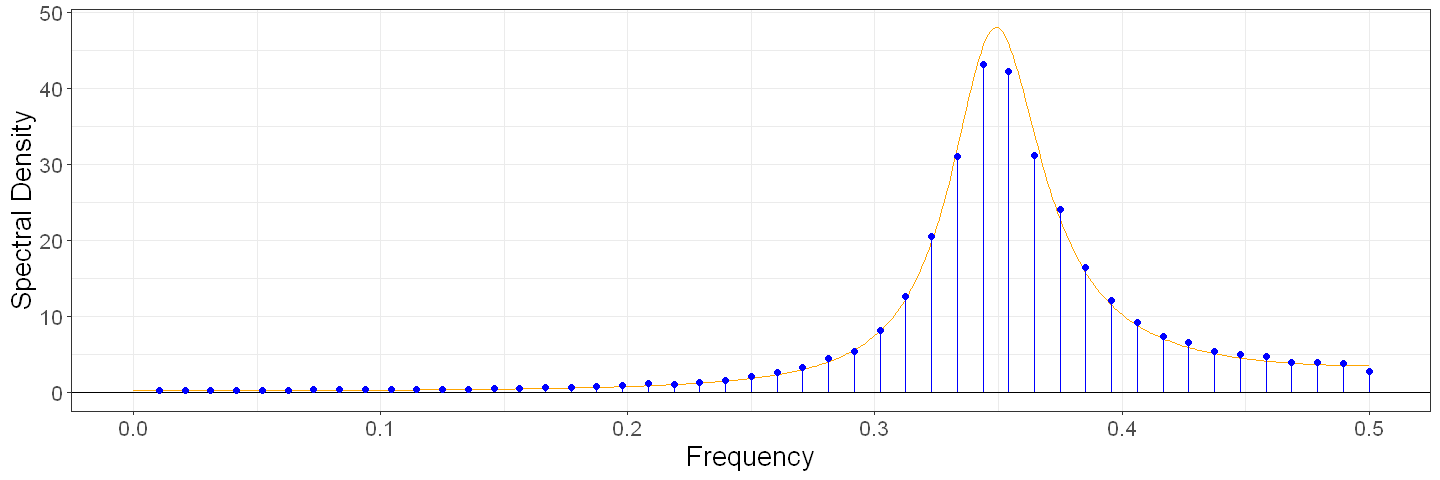

In [12]:
options(repr.plot.width=12, repr.plot.height=4)

ft = 0:500 / 1000
d = spectral_density_ar2(-1, -0.75)(ft) * 2

ggplot() + 
  geom_hline(yintercept=0, color='black') +
  geom_line(aes(x=ft, y=d), color='orange') +
  geom_point(aes(x=f, y=Pxx_std), color='blue') +
  geom_segment(aes(x=f, y=Pxx_std, xend=f, yend=0), color='blue') +
  xlab('Frequency') + ylab('Spectral Density') +
  theme_bw() + theme(text = element_text(size=16))

Again, a reasonable agreement in shape (after scaling adjustment).

**(c)**  The expected distribution of the sample spectral density at any particular frequency should be a chi-squared distribution with two degrees of freedom.

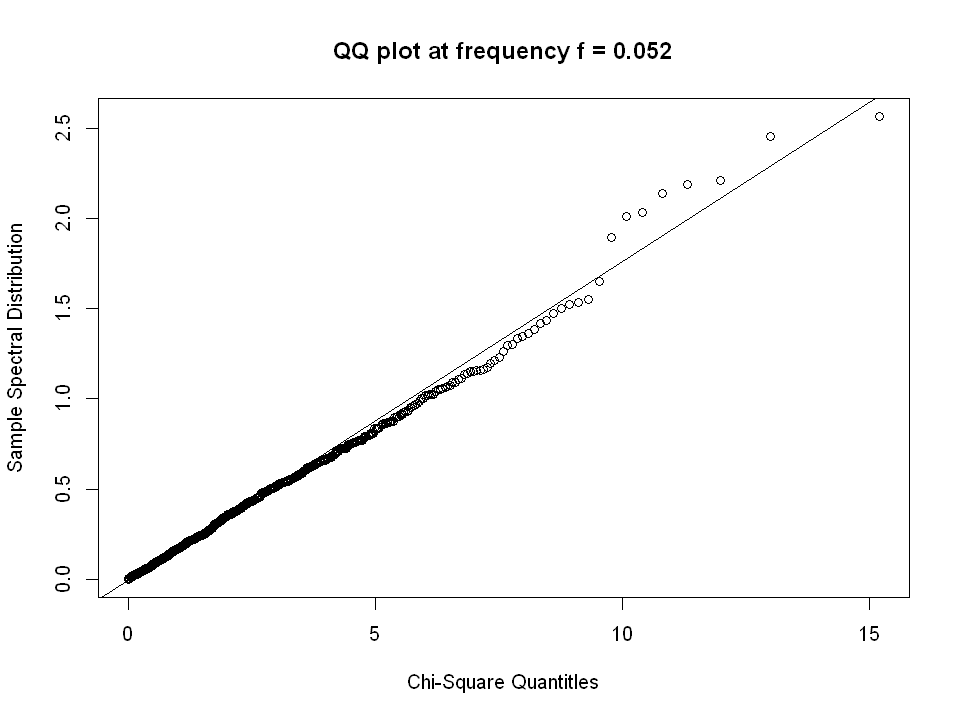

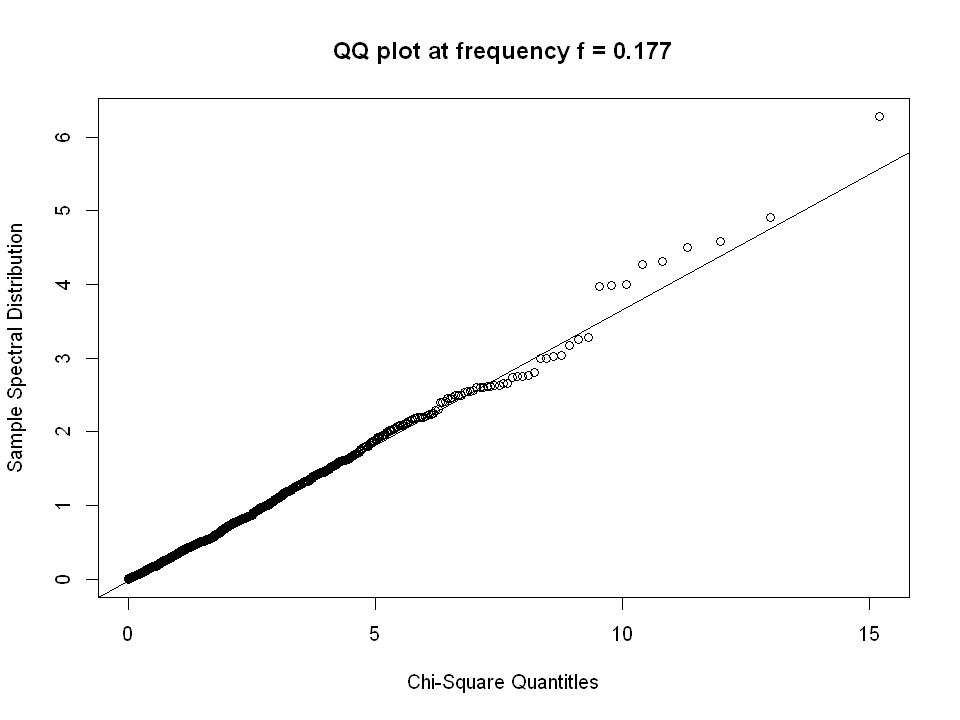

In [13]:
plot_frequency(Pxx, 5, f[5])
plot_frequency(Pxx, 17, f[17])

Once again, the QQ plots seem to be in agreement.

**Exercise 13.34**.  Simulate a zero-mean, unit-variance, normal white noise time series of length $n = 1000$. Display the periodogram of the series, and comment on the results.